<a href="https://colab.research.google.com/github/ashishsalunkhe/Detecting-Anomalies-and-Influence-of-External-Factors-over-Time-Series-Data/blob/main/ExternalFactorsTimeseriesAndDetecting_Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytrends yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 28.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
from pytrends import dailydata
import yfinance as fin
from datetime import datetime

In [3]:
# selecting ticker for yahoo finance
ticker = 'INTC' # which stock to search for
ticker_handle = fin.Ticker(ticker) # ticker handler
company_name = ticker_handle.info.get('shortName')

# getting 30 days of trend and finance data
t_now = datetime.now()
t_prev= datetime.fromtimestamp(t_now.timestamp()-(3600*24*30))
trends = dailydata.get_daily_data(company_name,t_prev.year,t_prev.month,
                                  t_now.year,t_now.month)
fin_data = fin.download(ticker,start=t_prev.strftime('%Y-%m-%d'),
                        end=t_now.strftime('%Y-%m-%d'))

print('Most Recent Stock Price for  on : $'.format(\
    company_name,fin_data.index[-1].strftime('%m-%d-%Y'),fin_data.values[-1,3]))
print('Most Recent Google Trend Data for  on : '.format(company_name,
                                                       trends.index[-1].strftime('%m-%d-%Y'),
                                                                      trends.values[-1,3]))

Intel Corporation:2021-12-01 2021-12-31
Intel Corporation:2022-01-01 2022-01-31
[*********************100%***********************]  1 of 1 completed
Most Recent Stock Price for  on : $
Most Recent Google Trend Data for  on : 


Pfizer,:2015-01-01 2015-01-31
Pfizer,:2015-02-01 2015-02-28
Pfizer,:2015-03-01 2015-03-31
Pfizer,:2015-04-01 2015-04-30
Pfizer,:2015-05-01 2015-05-31
Pfizer,:2015-06-01 2015-06-30
Pfizer,:2015-07-01 2015-07-31
Pfizer,:2015-08-01 2015-08-31
Pfizer,:2015-09-01 2015-09-30
Pfizer,:2015-10-01 2015-10-31
Pfizer,:2015-11-01 2015-11-30
Pfizer,:2015-12-01 2015-12-31
Pfizer,:2016-01-01 2016-01-31
Pfizer,:2016-02-01 2016-02-29
Pfizer,:2016-03-01 2016-03-31
Pfizer,:2016-04-01 2016-04-30
Pfizer,:2016-05-01 2016-05-31
Pfizer,:2016-06-01 2016-06-30
Pfizer,:2016-07-01 2016-07-31
Pfizer,:2016-08-01 2016-08-31
Pfizer,:2016-09-01 2016-09-30
Pfizer,:2016-10-01 2016-10-31
Pfizer,:2016-11-01 2016-11-30
Pfizer,:2016-12-01 2016-12-31
Pfizer,:2017-01-01 2017-01-31
Pfizer,:2017-02-01 2017-02-28
Pfizer,:2017-03-01 2017-03-31
Pfizer,:2017-04-01 2017-04-30
Pfizer,:2017-05-01 2017-05-31
Pfizer,:2017-06-01 2017-06-30
Pfizer,:2017-07-01 2017-07-31
Pfizer,:2017-08-01 2017-08-31
Pfizer,:2017-09-01 2017-09-30
Pfizer,:20

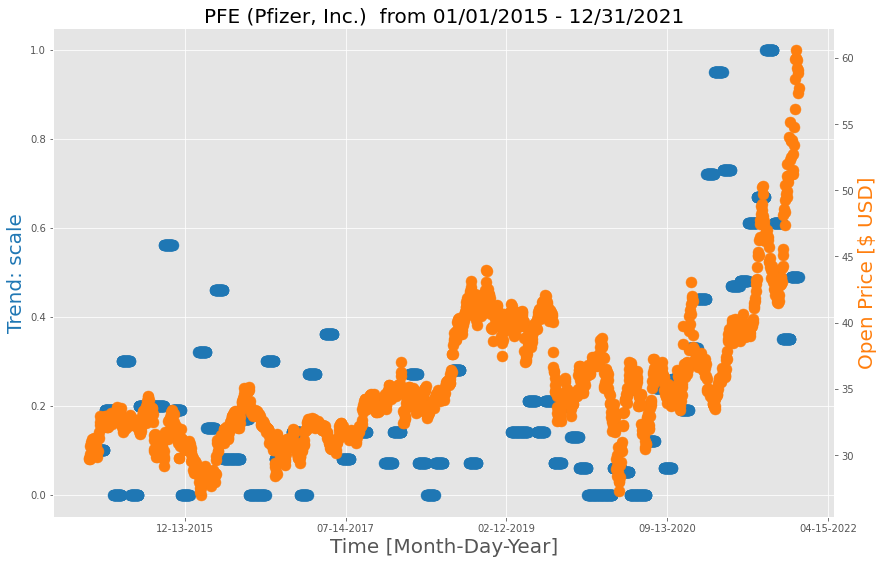

In [4]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'PFE' # which stock to search for
date_range = [1,1,2015,12,31,2021] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled 

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# PLOTTING ROUTINES
######################################
#
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(14,9))

fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_x = trend_x[trend_start_indx:trend_end_indx+1] # align trends + stock $
trend_y = trend_y[trend_start_indx:trend_end_indx+1] # align trends + stock $

scat1 = ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0),s=120) # scatter trend data

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),
              fontsize=20,color=plt.cm.tab20(0))
x_ticks = ax.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax.set_xticklabels(x_str_labels) # format dates on x-axis
ax.set_xlabel('Time [Month-Day-Year]',fontsize=20)

ax2 = ax.twinx() # twin axis to plot both data on the same plot
ax2.grid(False) # this prevents the axes from being too messy
scat2 = ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2),s=120) # scatter finance data
ax2.set_ylabel(fin_keys[fin_indx]+' Price [$ USD]',fontsize=20,color=plt.cm.tab20(2))

plt.title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot

Pfizer,:2015-01-01 2015-01-31
Pfizer,:2015-02-01 2015-02-28
Pfizer,:2015-03-01 2015-03-31
Pfizer,:2015-04-01 2015-04-30
Pfizer,:2015-05-01 2015-05-31
Pfizer,:2015-06-01 2015-06-30
Pfizer,:2015-07-01 2015-07-31
Pfizer,:2015-08-01 2015-08-31
Pfizer,:2015-09-01 2015-09-30
Pfizer,:2015-10-01 2015-10-31
Pfizer,:2015-11-01 2015-11-30
Pfizer,:2015-12-01 2015-12-31
Pfizer,:2016-01-01 2016-01-31
Pfizer,:2016-02-01 2016-02-29
Pfizer,:2016-03-01 2016-03-31
Pfizer,:2016-04-01 2016-04-30
Pfizer,:2016-05-01 2016-05-31
Pfizer,:2016-06-01 2016-06-30
Pfizer,:2016-07-01 2016-07-31
Pfizer,:2016-08-01 2016-08-31
Pfizer,:2016-09-01 2016-09-30
Pfizer,:2016-10-01 2016-10-31
Pfizer,:2016-11-01 2016-11-30
Pfizer,:2016-12-01 2016-12-31
Pfizer,:2017-01-01 2017-01-31
Pfizer,:2017-02-01 2017-02-28
Pfizer,:2017-03-01 2017-03-31
Pfizer,:2017-04-01 2017-04-30
Pfizer,:2017-05-01 2017-05-31
Pfizer,:2017-06-01 2017-06-30
Pfizer,:2017-07-01 2017-07-31
Pfizer,:2017-08-01 2017-08-31
Pfizer,:2017-09-01 2017-09-30
Pfizer,:20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


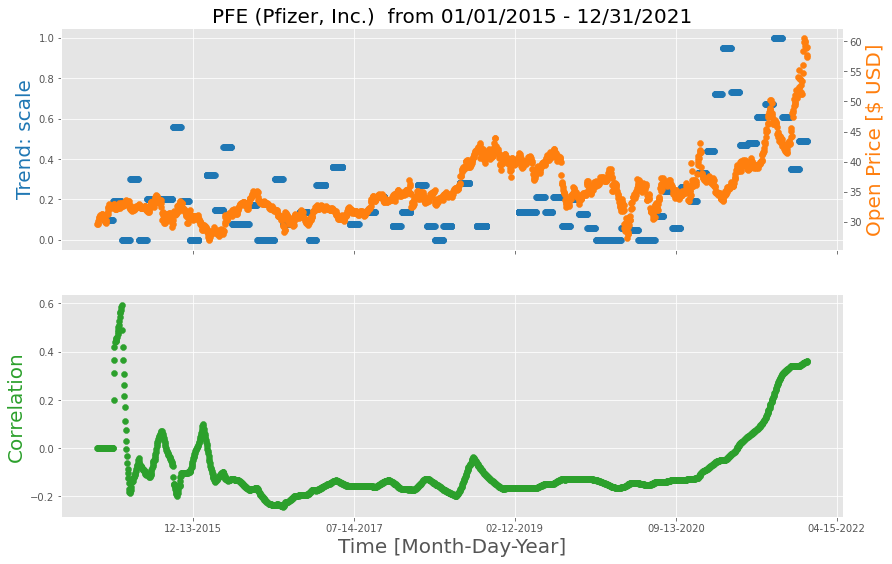

In [5]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'PFE' # which stock to search for
date_range = [1,1,2015,12,31,2021] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled 

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1,len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii]-mean_x,2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii]-mean_y,2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),
                                     np.subtract(fin_y[0:ii],mean_y))))\
              /(sigma_x*sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig,axs = plt.subplots(2,1,figsize=(14,9),sharex=True)

ax = axs[0]
ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2))

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),color=plt.cm.tab20(0),fontsize=20)
ax2.set_ylabel(fin_keys[fin_indx]+' Price [$ USD]',color=plt.cm.tab20(2),fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x,corr_xy_array,color=plt.cm.tab20(4)) # scatter trend data
ax3.set_ylabel('Correlation',
              fontsize=20,color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels) # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]',fontsize=20)
ax2.set_xticklabels(x_str_labels)

ax.set_title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot

In [6]:
fin_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,29.667933,30.151802,29.620493,29.724857,22.953115,16371571
2015-01-05,29.743834,29.800758,29.421251,29.563566,22.828566,24786391
2015-01-06,29.667933,30.227703,29.525618,29.810247,23.019049,29468681
2015-01-07,30.094877,30.237192,29.962049,30.218216,23.334082,20248816
2015-01-08,30.683111,30.967743,30.569260,30.834915,23.810286,49169522


In [7]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [8]:
# fin_data.drop(columns=['Adj Close'], inplace = True)

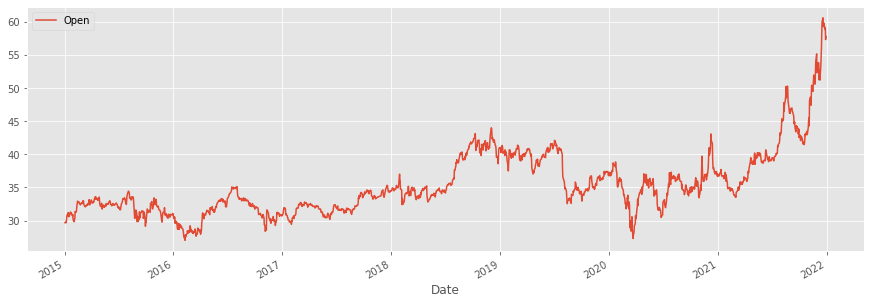

In [9]:
fin_data.plot(y=['Open'])

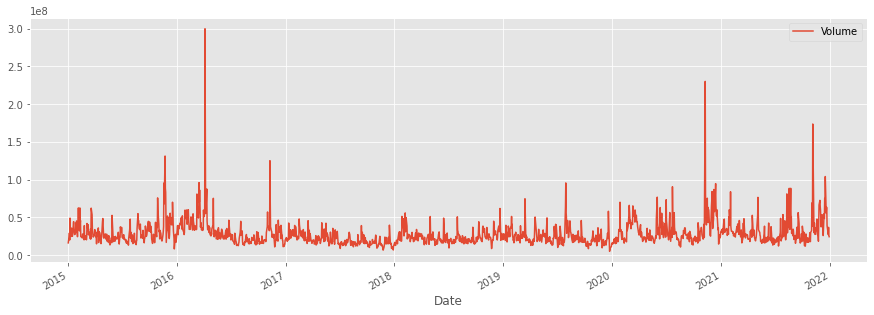

In [10]:
fin_data.plot(y=['Volume'])

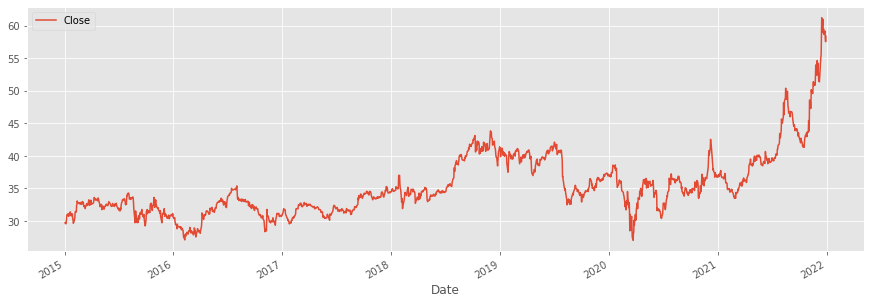

In [11]:
fin_data.plot(y=['Close'])

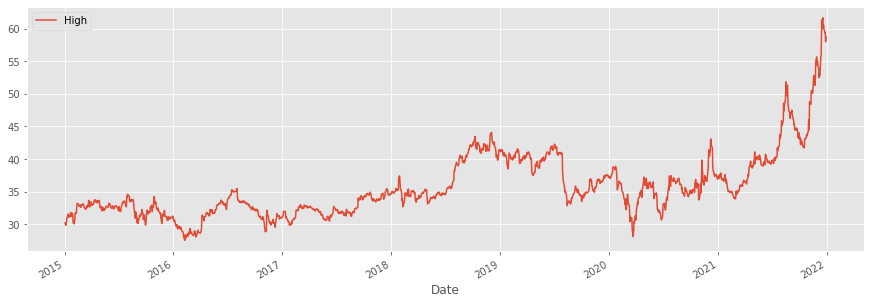

In [12]:
fin_data.plot(y=['High'])

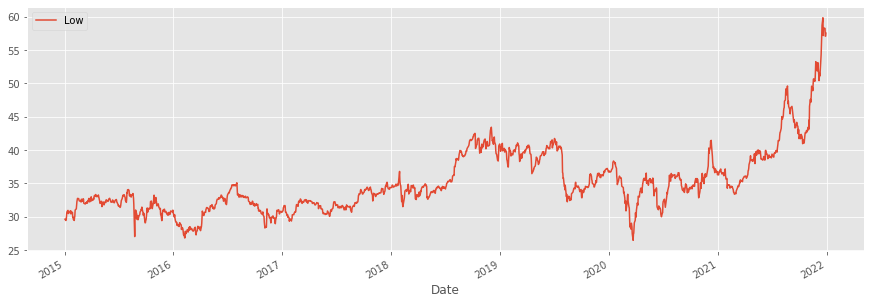

In [13]:
fin_data.plot(y=['Low'])

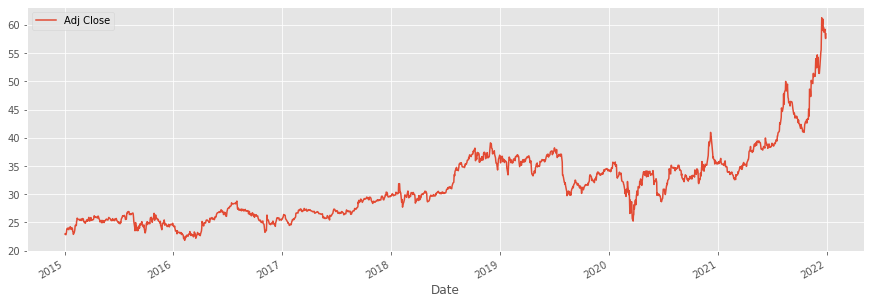

In [14]:
fin_data.plot(y=['Adj Close'])


Based on above plots:
1.   Open - This time series follows a good trend
2.   Volume -  Doesn't follow a pattern. Inconsistent.



In [15]:
fin_data.to_csv("PFEstockprice.csv")

In [16]:
import glob
import os
import pandas as pd
import numpy as np
from datetime import datetime

In [17]:
from sklearn.ensemble import IsolationForest


def iforest(_df, contamination):
    import warnings
    warnings.filterwarnings('ignore')

    isolation_forest = IsolationForest(n_estimators=100, contamination=contamination)
    
    # Fit give data
    isolation_forest.fit(_df)
    
    # Use same data for identifying anomalous records
    anomaly_score = isolation_forest.decision_function(_df)
    anomaly = isolation_forest.predict(_df)
    
    # Score is inversely proportioanl to the strength of anomaly
    _df['score'] = anomaly_score
    _df['anomaly'] = anomaly
    
    print(f'Total number of records: {_df.shape[0]}')
    # 'anomaly' = -1 indicates anomaly record
    print(f'Number of anomalies: {anomaly[anomaly == -1].size}')
    _df = _df.sort_values(by=['score'])
    return _df

### 2.1. Univariate anomaly detection


In [18]:
anomaly_percentage = 0.01

def iforest_on_column(data, column, no_of_anomalies):
    anomalies = iforest(data[[column]], anomaly_percentage)

    # Let's plot the data along with anomalies
    top_anomalous_records = anomalies[0:no_of_anomalies]
    top_anomalous_records = top_anomalous_records[top_anomalous_records['anomaly'] == -1]
    print('----- Anomalies -----')
    print(top_anomalous_records.head())
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.scatter(anomalies.index, anomalies[column], label=column)
    plt.scatter(top_anomalous_records.index, top_anomalous_records[column], facecolors="red", s=100, label='anomalies')
    plt.ylabel(column)
    plt.legend()
    plt.show()

### 2.2. Multivariate anomaly detection

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-12-23  59.820000  60.080002  58.310001  58.709999  58.709999  39203200
2021-12-27  58.849998  59.380001  58.230000  59.200001  59.200001  27362600
2021-12-28  59.049999  59.450001  57.080002  58.009998  58.009998  36901700
2021-12-29  57.310001  58.029999  57.070000  57.580002  57.580002  26170200
2021-12-30  57.750000  58.740002  57.529999  58.400002  58.400002  24559000
Total number of records: 40
Number of anomalies: 1
----- Anomalies -----
                 Open     score  anomaly
Date                                    
2021-11-04  44.290001 -0.019409       -1


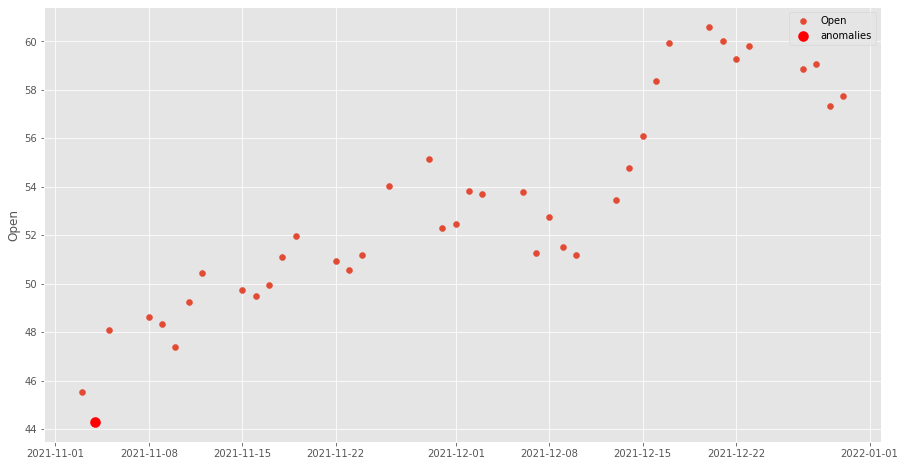

In [19]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
pfe_sp = pd.read_csv('/content/PFEstockprice.csv', parse_dates=['Date'], date_parser=dateparse, index_col=['Date']).sort_index()
print(pfe_sp.tail(5))

# last_n = -1
last_n = 40
top = 10

data = pfe_sp.iloc[-last_n:] if last_n > 0 else pfe_sp.copy(deep=True)

iforest_on_column(data, 'Open', top)

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

def dbscan(X, eps, min_points):
    # Scale the values between 0 and 1    
    for c in X.columns.values:
        X[c] = MinMaxScaler((0, 1)).fit_transform(np.array(X[c].tolist()).reshape(-1, 1))

    # Fit the model
    db = DBSCAN(eps=eps, min_samples=min_points).fit(X)
    X['label'] = db.labels_
    labels = set(db.labels_)
    print(f'No. of clusters: {len(labels) - 1}')
    
    # Plot the data
    noise = X[X['label'] == -1]
    print('----- Anomalies -----')
    print(noise.drop(['label'], axis=1))
    not_noise = X[X['label'] > -1]
    plt.rcParams["figure.figsize"] = (15, 8)
    if X.shape[1] == 2: # Column 'label' has been added
        print('\nUnivariate anomaly detection')
        col = noise.columns[0]
        plt.plot(noise.index, noise[col], 'o', markerfacecolor='red',
                 markeredgecolor='red', markersize=6, label='anomalies')
        plt.plot(not_noise.index, not_noise[col], 'o', markerfacecolor='mediumseagreen',
                 markeredgecolor='green', markersize=6, label=col)
    else:
        print('\nMultivariate anomaly detection')
        col1 = noise.columns[0]
        col2 = noise.columns[1]
        plt.plot(noise[col1], noise[col2], 'o', markerfacecolor='red',
                 markeredgecolor='red', markersize=6, label='anomalies')
        plt.plot(not_noise[col1], not_noise[col2], 'o', markerfacecolor='mediumseagreen',
                 markeredgecolor='green', markersize=6)
    plt.title(f'number of clusters: {len(labels) - 1}')
    plt.legend()
    plt.show()

No. of clusters: 2
----- Anomalies -----
                Open
Date                
2021-11-03  0.075414
2021-11-04  0.000000
2021-12-29  0.798283

Univariate anomaly detection


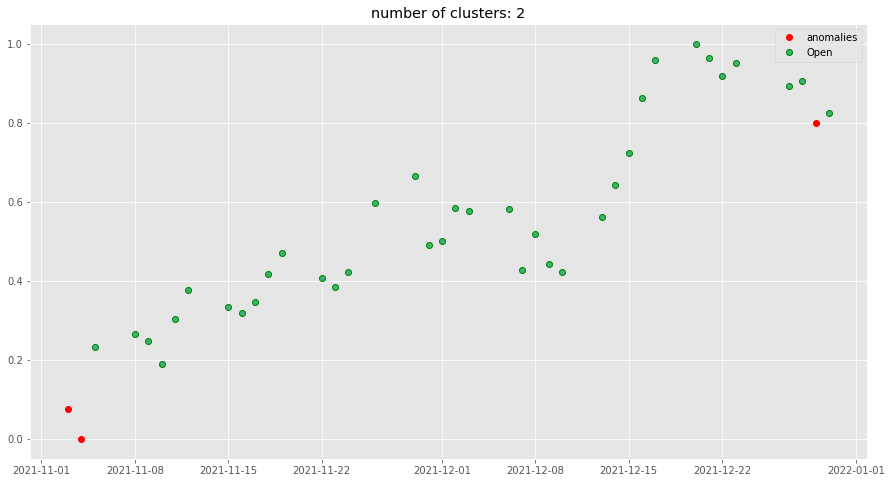

In [21]:
eps = 0.09
min_points = 8
# last_n = -1
last_n = 40

data = pfe_sp.iloc[-last_n:] if last_n > 0 else pfe_sp.copy(deep=True)
dbscan(data[['Open']], eps, min_points)

In [22]:
! pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


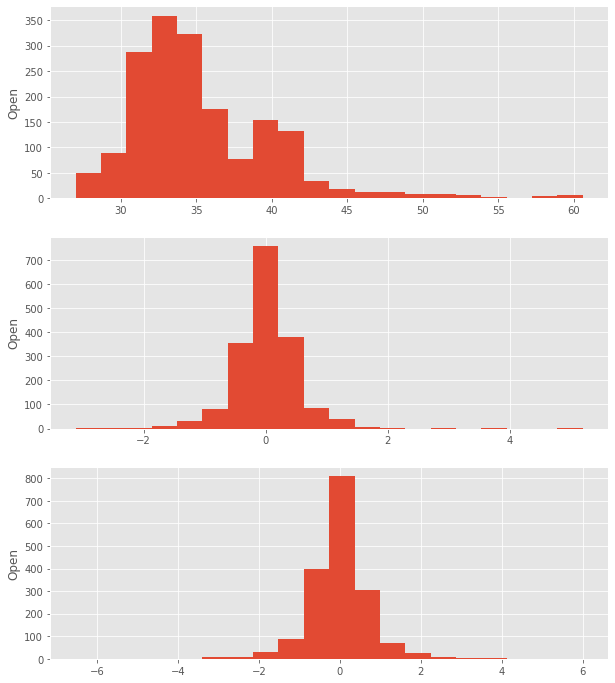

Mean after first differencing: Open    0.015947
dtype: float64
Mean after second differencing: Open    0.000207
dtype: float64


In [23]:
column = 'Open'
bins = 20

pfe_sp_diff_1 = pfe_sp[[column]].diff(periods=1).dropna()
pfe_sp_diff = pfe_sp_diff_1[[column]].diff(periods=1).dropna()

fig = plt.figure(figsize=(10, 12))
ax1 = fig.add_subplot(311)
ax1.hist(pfe_sp[column], bins=bins)
ax1.set_ylabel(column)
ax2 = fig.add_subplot(312)
ax2.hist(pfe_sp_diff_1[column], bins=bins)
ax2.set_ylabel(column)
ax3 = fig.add_subplot(313)
ax3.hist(pfe_sp_diff[column], bins=bins)
ax3.set_ylabel(column)
plt.show()
print(f'Mean after first differencing: {pfe_sp_diff_1.mean()}')

print(f'Mean after second differencing: {pfe_sp_diff.mean()}')

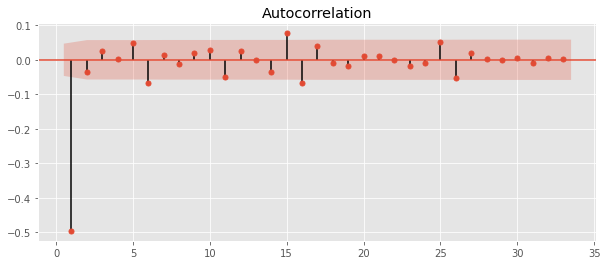

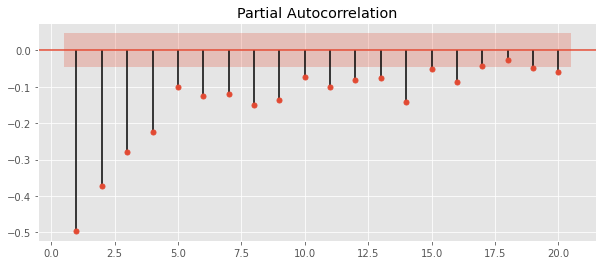

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lags = 20

plt.rcParams["figure.figsize"] = (10, 4)
plot_acf(pfe_sp_diff[column], zero=False)
plt.show()

plt.rcParams["figure.figsize"] = (10, 4)
plot_pacf(pfe_sp_diff[column], lags=lags, zero=False)
plt.show()

In [27]:
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def arima_walk_forward(_df, _column, _order, top):
    _df = _df[[_column]]
    actual_vals = _df[_column].values
    
    train_count = 100
    X_train, X_test = actual_vals[0:train_count], actual_vals[train_count:]
    
    scaler = MinMaxScaler()
    scaler.fit(np.array(X_train).reshape(-1, 1))
    X_train = scaler.transform(np.array(X_train).reshape(-1, 1))
    X_test = scaler.transform(np.array(X_test).reshape(-1, 1))

    history = [x for x in X_train]
    predictions = []
    predict_log = []
    for t in range(len(X_test)):
        model = ARIMA(history, order=_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = scaler.inverse_transform(np.array(output).reshape(1, 1))[0][0]

        predictions.append(yhat)
        history.append(X_test[t])
        predict_log.append(output[0])

    _df_test = _df.iloc[train_count:]
    _df_test[f'{column}_prediction'] = predictions
    _df_test[f'{column}_prediction_error'] = _df_test[column] - _df_test[f'{column}_prediction']

    _df_test.sort_values(by=[f'{column}_prediction_error'], ascending=False, inplace=True)
    outliers = _df_test[0:top]

    # plot
    plt.rcParams["figure.figsize"] = (15, 8)
    plt.plot(_df_test.index, _df_test[column], 'o', markerfacecolor='mediumseagreen',
             markeredgecolor='green', markersize=6, label=column)
    plt.plot(outliers.index, outliers[column], 'o', markerfacecolor='red',
             markeredgecolor='red', markersize=6, label='anomalies')
    plt.legend()
    plt.show()
    return outliers

In [25]:
p, d, q = 0, 2, 1
top = 5
column = 'Open'

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
pfe_sp = pd.read_csv('/content/PFEstockprice.csv', parse_dates=['Date'], date_parser=dateparse, index_col=['Date']).sort_index()

def arima_resid(_df, _column, _order, top):
    _df = _df[[_column]]
    actual_vals = _df[_column].values

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(np.array(actual_vals).reshape(-1, 1))
    model = ARIMA(scaled_data, order=_order)
    arima_result = model.fit()
    _df['fitted'] = scaler.inverse_transform(np.array(arima_result.fittedvalues).reshape(-1, 1))
    _df['resid'] = np.abs(arima_result.resid)
    for i in range(_order[1]):
        _df['fitted'][i] = _df[_column][i]
        _df['resid'][i] = 0

    _outliers = _df.sort_values(by=['resid'], ascending=False)[0:top]

    # plot
    plt.rcParams["figure.figsize"] = (15, 10)
    plt.plot(_df.index, actual_vals, 'o', markerfacecolor='mediumseagreen',
             markeredgecolor='green', markersize=6, label=_column)
    plt.plot(_outliers.index, _outliers[_column], 'o', markerfacecolor='red',
             markeredgecolor='red', markersize=6, label='anomalies')
    plt.plot(_df.index, _df['fitted'], color='blue', label='fitted')
    plt.legend()
    plt.show()
    return _outliers

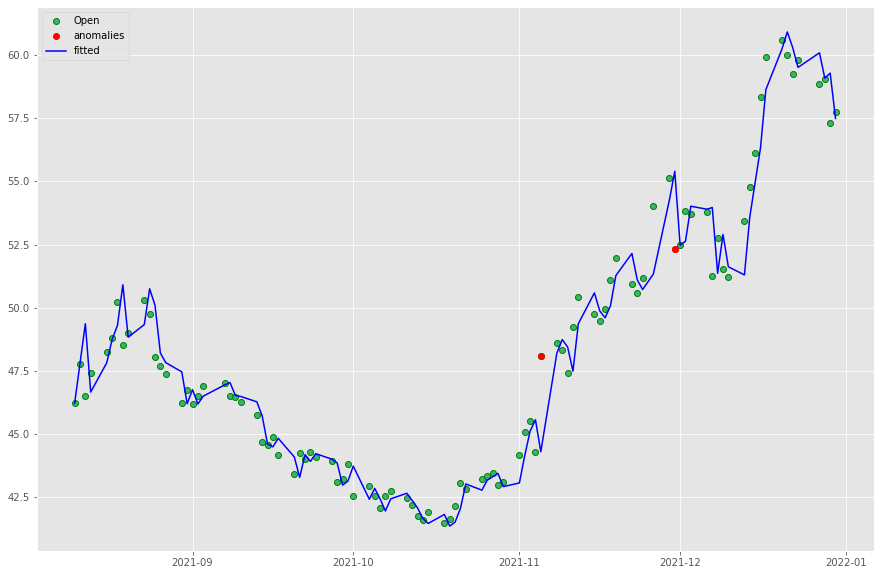

                 Open     fitted     resid
Date                                      
2021-11-05  48.090000  44.283571  0.198769
2021-11-30  52.310001  55.404230  0.161579


In [28]:
last_n = 100
top = 2

outliers = arima_resid(pfe_sp.iloc[-last_n:], column, (p, d, q), top)
print(outliers)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

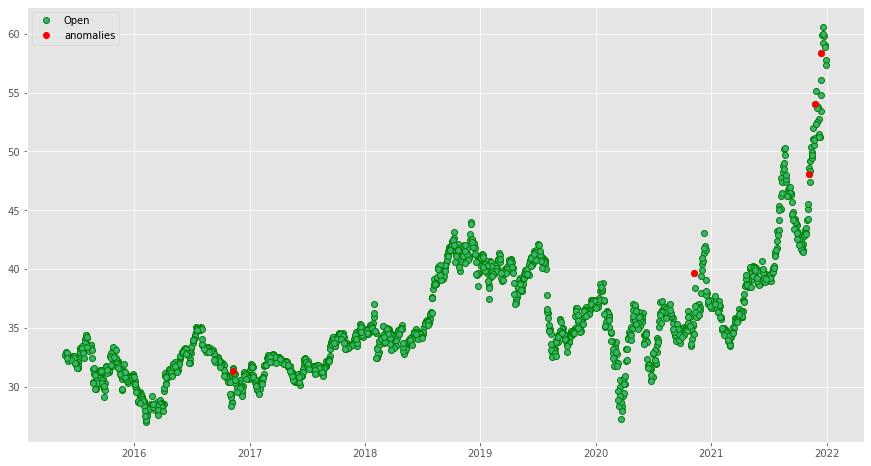

                 Open  Open_prediction  Open_prediction_error
Date                                                         
2020-11-09  39.715370        34.555737               5.159633
2021-11-05  48.090000        44.342078               3.747922
2021-11-26  54.040001        51.152973               2.887028
2016-11-09  31.318787        28.591166               2.727621
2021-12-16  58.360001        56.047173               2.312828


In [29]:
p, d, q = 0, 1, 1

top = 5
column = 'Open'
outliers = arima_walk_forward(pfe_sp.dropna(), column, (p, d, q), top)
print(outliers)